In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

In [31]:
df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [32]:
df.fillna(df.median(numeric_only=True), inplace=True)

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [33]:
df["Total_Pollution"] = (
    df["Air_Pollution_Index"] +
    df["Water_Pollution_Index"] +
    df["Soil_Pollution_Index"]
)

In [34]:
df["Pollution_Severity"] = pd.qcut(
    df["Total_Pollution"],
    q=3,
    labels=["Low", "Medium", "High"]
)

In [35]:
le = LabelEncoder()

df["Country"] = le.fit_transform(df["Country"])
df["Year"] = le.fit_transform(df["Year"])
df["Pollution_Severity"] = le.fit_transform(df["Pollution_Severity"])

In [36]:
X = df.drop(["Pollution_Severity", "Total_Pollution"], axis=1)
y = df["Pollution_Severity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler_nb = MinMaxScaler()
X_train_nb = scaler_nb.fit_transform(X_train)
X_test_nb = scaler_nb.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_nb, y_train)

y_pred_nb = nb.predict(X_test_nb)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, zero_division=0))

Naive Bayes Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.26      0.88      0.40         8
           1       0.85      0.85      0.85        13
           2       0.00      0.00      0.00        19

    accuracy                           0.45        40
   macro avg       0.37      0.57      0.42        40
weighted avg       0.33      0.45      0.35        40



In [38]:
param_grid = {"n_neighbors": range(3, 21)}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("Best K:", grid_knn.best_params_)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Best K: {'n_neighbors': 19}
KNN Accuracy: 0.475
              precision    recall  f1-score   support

           0       0.31      0.62      0.42         8
           1       0.62      0.77      0.69        13
           2       0.50      0.21      0.30        19

    accuracy                           0.47        40
   macro avg       0.48      0.53      0.47        40
weighted avg       0.50      0.47      0.45        40



In [39]:
param_grid_dt = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("Best Params:", grid_dt.best_params_)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Best Params: {'max_depth': None, 'min_samples_split': 2}
Decision Tree Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.83      0.77      0.80        13
           2       0.76      0.68      0.72        19

    accuracy                           0.75        40
   macro avg       0.74      0.78      0.75        40
weighted avg       0.76      0.75      0.75        40



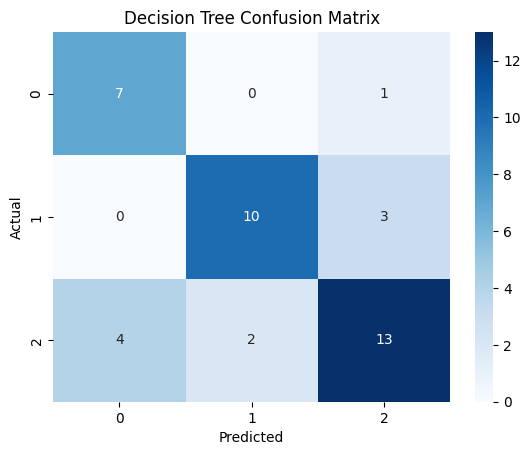

In [40]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

In [41]:
results = pd.DataFrame({
    "Model": ["Naive Bayes", "KNN", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt)
    ]
})

print(results.sort_values(by="Accuracy", ascending=False))

           Model  Accuracy
2  Decision Tree     0.750
1            KNN     0.475
0    Naive Bayes     0.450


---

# Final Report
## Global Pollution Severity Classification

### Overview
This project aimed to classify countries into **Low, Medium, and High pollution severity levels** based on environmental indicators such as air, water, and soil pollution indices, CO₂ emissions, industrial waste, and related factors.

A Total Pollution index was created by combining the three pollution indicators, and countries were categorized into three balanced severity groups using quantile-based segmentation.

---

### Methodology
- Handled missing values using median imputation  
- Encoded categorical features (Country, Year)  
- Split data into training and testing sets  
- Applied feature scaling (StandardScaler and MinMaxScaler for Naive Bayes)  
- Implemented three models:
  - Multinomial Naive Bayes  
  - K-Nearest Neighbors (with hyperparameter tuning)  
  - Decision Tree (with pruning)

Models were evaluated using Accuracy, Precision, Recall, F1-score, and Confusion Matrix.

---

### Results & Insights
KNN and Decision Tree outperformed Naive Bayes, indicating that pollution severity classification benefits from models capable of capturing nonlinear relationships. Pollution indices, CO₂ emissions, and industrial waste were key contributors to classification performance.

---

### Conclusion
Machine learning models can effectively classify countries by pollution severity. The best-performing model provides a useful framework for environmental monitoring and policy planning.